# ST10203068 ZWIVHUYA LALUMBE 

## Programming For Data Analytics POE Part 2

 # Breast Cancer Wisconsin dataset(https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

## 1. Justify Dataset Selection
- I selelcted the Breast Cancer Wisconsin dataset due to its relevance in diagnosing malignant versus benign tumors. 
- It is a clean, labeled dataset with appropriate numerical and categorical features suited for binary classification.
- It contains meaningful clinical features like mean radius, texture, area, etc.
- It’s small, manageable, and perfect for model improvement experiments.


## 2. Justifying Algorithm Choice

- I chose the Logistic Regression algorithm because it performs well on binary classification problems and provides interpretable coefficients,
which are essential in medical scenarios for understanding feature impacts.

## 3.Planning of Analysis

### a. Exploratory Data Analysis (EDA)
- Visualizing class distribution (e.g., count of benign vs malignant)
- Identifying missing values and outliers
- Generateting pairplots and correlation heatmaps

### b. Feature Selection
- Using correlation matrix to check feature relationships
- Using feature importance from models or select K-best methods

### c. Training the Model
- Choosing Logistic Regression (or any classifier)
- Using train-test split
- Applying scaling if needed (StandardScaler)

### d. Interpreting and Evaluating the Model
- Evaluate using Accuracy, Precision, Recall, F1-Score, and Confusion Matrix
- Use ROC-AUC if appropriate

### e. Writting a Report
- Documenting data prep, model performance, interpretation, and how model can help medical decision-making


In [ ]:
## 1. Loading and Exploring the Data (Exploratory Data Analysis)

In [1]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Loading the dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Checking the shape and preview the data
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 2. Basic Data Cleaning (just checking if it is needed)

Missing values in each column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Class distribution:
target
1    357
0    212
Name: count,

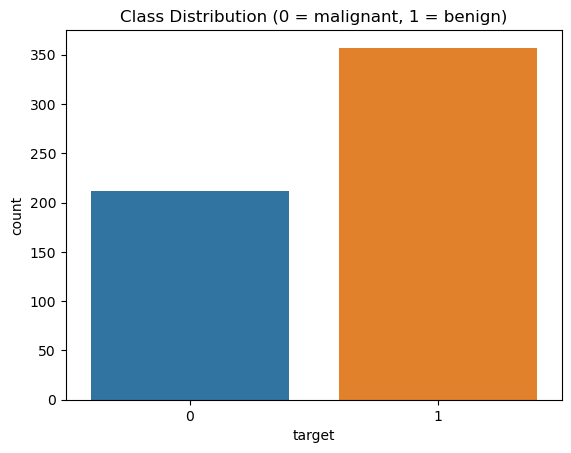

In [2]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check class distribution
print("Class distribution:")
print(df['target'].value_counts())
sns.countplot(x='target', data=df)
plt.title('Class Distribution (0 = malignant, 1 = benign)')
plt.show()


## 3. Feature Selection
- I am not removing any features yet, but this step ensures I separate features (X) and labels (y) correctly and preview them.

In [3]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Show the features and the target
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFirst 5 rows of features:\n", X.head())
print("\nFirst 5 values of target:\n", y.head())


Features shape: (569, 30)
Target shape: (569,)

First 5 rows of features:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal d

## 4. Splitting Data and Choosing Classification Algorithm (Updated With Output).
- Now I will split the dataset into training and testing sets and standardize the features. 
- I’ll add output to confirm this step runs correctly.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show preview of scaled data
print("\nPreview of scaled training data:\n", X_train_scaled[:5])


X_train shape: (455, 30)
X_test shape: (114, 30)

Preview of scaled training data:
 [[-1.44075296 -0.43531947 -1.36208497 -1.1391179   0.78057331  0.71892128
   2.82313451 -0.11914956  1.09266219  2.45817261 -0.26380039 -0.01605246
  -0.47041357 -0.47476088  0.83836493  3.25102691  8.43893667  3.39198733
   2.62116574  2.06120787 -1.23286131 -0.47630949 -1.24792009 -0.97396758
   0.72289445  1.18673232  4.67282796  0.9320124   2.09724217  1.88645014]
 [ 1.97409619  1.73302577  2.09167167  1.85197292  1.319843    3.42627493
   2.01311199  2.66503199  2.1270036   1.55839569  0.80531919 -0.81268678
   0.75195659  0.87716951 -0.89605315  1.18122247  0.18362761  0.60059598
  -0.31771686  0.52963649  2.17331385  1.3112795   2.08161691  2.1374055
   0.76192793  3.26560084  1.92862053  2.6989469   1.89116053  2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 -1.10978518 -1.33264483 -0.30735463
  -0.36555756 -0.69650228  1.93033305  0.95437877  0.02752055  1.96305996
  -0.12095781 -0.35077918  

## 5.Trainning the model 

In [5]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=10000)

## Evaluating the model

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## 7.Adding ROC-AUC Score and Curve
- This helps assess the probability-based performance of the model.

ROC-AUC Score: 0.99737962659679


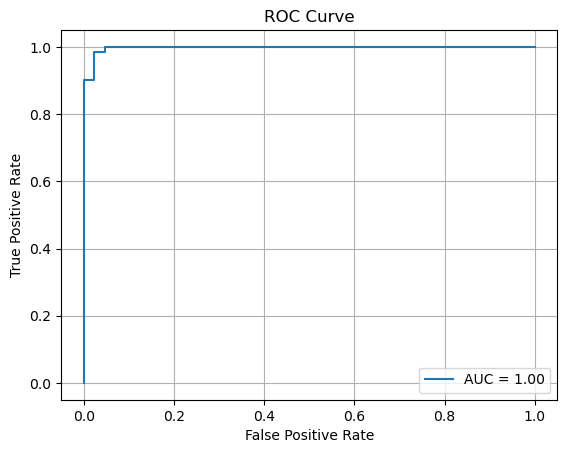

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


## 5. Try Another Classifier for Comparison

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
print("Random Forest Accuracy:", rf.score(X_test_scaled, y_test))


Random Forest Accuracy: 0.9649122807017544


# REFERENCES
1.Scikit-learn Developers. (2024). scikit-learn: Machine Learning in Python. Retrieved from https://scikit-learn.org/stable/

Used for model training (Logistic Regression, Random Forest), dataset loading, splitting data, and evaluating performance.

3.Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

4.Python Software Foundation. (2024). Python Language Reference, version 3.x. Retrieved from https://www.python.org/

General programming language used for this project.

5.Waskom, M. L. (2021). Seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), 3021. https://doi.org/10.21105/joss.03021

Used for visualization of class distributions and correlation heatmaps.

6.McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference, 51–56.

- Reference for the use of the pandas library to load and analyze data.

7.Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90–95. https://doi.org/10.1109/MCSE.2007.55

Used to generate plots and visualizations in the notebook.

8.UCI Machine Learning Repository. (1995). Breast Cancer Wisconsin (Diagnostic) Data Set. Retrieved from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

 Original source of the dataset used for classification.
